In [23]:
import numpy as np
import cv2
from cv2 import imread
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import argparse
from imutils import paths



# **Features Extraction**

**Moment invariant**

Reading image file

In [24]:
img1 = cv2.imread("Segmented_Teeth/segmented tooth1_1.png")
img2 = cv2.imread("Segmented_Teeth/segmented tooth1_2.png")
img3 = cv2.imread("Segmented_Teeth/segmented_tooth1_3.png")

In [25]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

In [26]:
moments1 = cv2.HuMoments(cv2.moments(img1)).flatten()
print("ORIGINAL MOMENTS for img 1: {}".format(moments1))

moments2 = cv2.HuMoments(cv2.moments(img2)).flatten()
print("ORIGINAL MOMENTS for img 2: {}".format(moments2))

moments3 = cv2.HuMoments(cv2.moments(img3)).flatten()
print("ORIGINAL MOMENTS for img 3: {}".format(moments3))

ORIGINAL MOMENTS for img 1: [9.31673872e-04 3.94367501e-07 1.16589393e-10 1.50416801e-11
 6.29560476e-22 9.44115823e-15 2.07860839e-23]
ORIGINAL MOMENTS for img 2: [9.32487012e-04 4.19574583e-07 7.85269033e-11 1.14095140e-11
 3.37913841e-22 7.05015323e-15 4.94653700e-23]
ORIGINAL MOMENTS for img 3: [1.18052474e-03 9.45728897e-07 1.96083982e-10 8.24694512e-11
 1.04041240e-20 7.77455385e-14 1.31763320e-21]


In [27]:
# for i in range(0,7):
#    moments1[i] = -np.sign(1.0, moments1[i])*np.math.log10(np.abs(moments1[i]))
   
#-1* copysign(1.0, huMoments[i]) * log10(abs(huMoments[i]))

lmoment1 = np.abs(np.log10(moments1))
print('log transformation for moments1',lmoment1)
lmoment2 = np.abs(np.log10(moments2))
print('log transformation for moments2', lmoment2)
lmoment3 = np.abs(np.log10(moments3))
print('log transformation for moments3', lmoment3)

log transformation for moments1 [ 3.03073608  6.40409888  9.93334096 10.82270365 21.20096254 14.02497472
 22.68222732]
log transformation for moments2 [ 3.03035721  6.37719083 10.10498153 10.94273285 21.47119402 14.15180144
 22.30569874]
log transformation for moments3 [ 2.92792491  6.02423334  9.70755788 10.0837069  19.98279448 13.10932452
 20.88020547]


In [28]:
dist = np.linalg.norm(lmoment1 - lmoment2)
print('Distance between moment1 and moment2',dist)

Distance between moment1 and moment2 0.5248576217835638


In [29]:
dist = np.linalg.norm(lmoment1 - lmoment3)
print('Distance between moment1 and moment3',dist)

Distance between moment1 and moment3 2.5142779577407346


 **SIFT**

In [36]:
img_n = imread('training dataset/crocodiles_aug/image_0_60.jpg')

In [32]:
def to_gray(color_img):
    gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    return gray

def gen_sift_features(gray_img):
    sift = cv2.SIFT_create()
    kp, desc = sift.detectAndCompute(gray_img, None)
    return kp, desc

def show_sift_features(gray_img, color_img, kp):
    return plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy()))

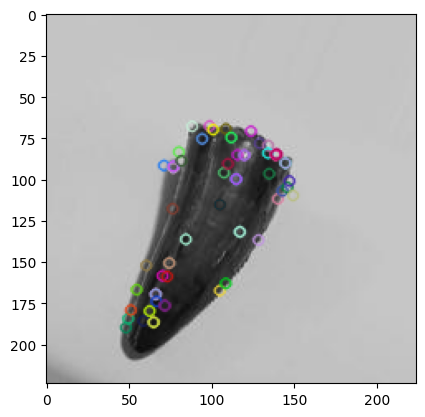

In [37]:
img_gray = to_gray(img_n)
img_kp, img_desc = gen_sift_features(img_gray)
show_sift_features(img_gray, img_n, img_kp)

In [38]:
print(len(img_kp), 'keypoints')

65 keypoints


In [39]:
def explain_keypoint(kp):
    print('angle\n', kp.angle)
    print('\nclass_id\n', kp.class_id)
    print('\noctave (image scale where feature is strongest)\n', kp.octave)
    print('\npt (x,y)\n', kp.pt)
    print('\nresponse\n', kp.response)
    print('\nsize\n', kp.size)

explain_keypoint(img_kp[1])

angle
 196.42919921875

class_id
 -1

octave (image scale where feature is strongest)
 1442559

pt (x,y)
 (49.301513671875, 184.55047607421875)

response
 0.024638643488287926

size
 2.308344602584839


# *Data Augmentation*

In [1]:
datapath="training dataset/crocodiles"
out="training dataset/crocodiles_aug"

datapath1="training dataset/sharks"
out1="training dataset/sharks_aug"

In [3]:
print("[INFO] loading images...")
imagePaths = list(paths.list_images(datapath))
imagePaths1 = list(paths.list_images(datapath1))
data=[]
data1=[]

[INFO] loading images...


In [4]:
for imagePath in imagePaths:
    print(imagePath)
    image = cv2.imread(imagePath)
	#cv2.imshow(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    data.append(image)
datanp=np.array(data)

for imagePath1 in imagePaths1:
    print(imagePath1)
    image1 = cv2.imread(imagePath1)
	#cv2.imshow(image)
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    image1 = cv2.resize(image1, (224, 224))
    image1 = img_to_array(image1)
    image1 = np.expand_dims(image1, axis=0)
    data1.append(image1)
datanp1=np.array(data1)

training dataset/crocodiles_aug\alligator-crocodile-fossils-5.jpg
training dataset/crocodiles_aug\cretaceous-crocodile-tooth-from-morocco-sku-v1725-elosuchus-cherifiensis-p1785-4765_image.jpg
training dataset/crocodiles_aug\images (1).jpg
training dataset/crocodiles_aug\image_0_1016.jpg
training dataset/crocodiles_aug\image_0_1025.jpg
training dataset/crocodiles_aug\image_0_1066.jpg
training dataset/crocodiles_aug\image_0_1092.jpg
training dataset/crocodiles_aug\image_0_1136.jpg
training dataset/crocodiles_aug\image_0_1162.jpg
training dataset/crocodiles_aug\image_0_129.jpg
training dataset/crocodiles_aug\image_0_1300.jpg
training dataset/crocodiles_aug\image_0_1316.jpg
training dataset/crocodiles_aug\image_0_1337.jpg
training dataset/crocodiles_aug\image_0_1380.jpg
training dataset/crocodiles_aug\image_0_1443.jpg
training dataset/crocodiles_aug\image_0_1504.jpg
training dataset/crocodiles_aug\image_0_152.jpg
training dataset/crocodiles_aug\image_0_174.jpg
training dataset/crocodiles_a

In [6]:
aug = ImageDataGenerator(
	rotation_range=30,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")
total = 0
imageGen=[]
imageGen1=[]

In [7]:
print("[INFO] generating images...")

# augmentedImages=[]
for i in range(len(datanp)):
        print("Generating is running")
  
        imageGen= aug.flow(datanp[i], batch_size=1, save_to_dir=out,
        save_prefix="image", save_format="jpg")
        for image in imageGen:
	# increment our counter
	        total += 1
	# if we have reached the specified number of examples, break
	# from the loop
	        if (total%6==0):
				#total = 0
		        break

# augmentedImages=[]
for i in range(len(datanp1)):
        print("Generating is running")
  
        imageGen1= aug.flow(datanp1[i], batch_size=1, save_to_dir=out1,
        save_prefix="image", save_format="jpg")
        for image1 in imageGen1:
	# increment our counter
	        total += 1
	# if we have reached the specified number of examples, break
	# from the loop
	        if (total%6==0):
				#total = 0
		        break

[INFO] generating images...
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Generating is running
Gene

# **CNN classification on dummy dataset**

In [11]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
tf.compat.v1.set_random_seed(2019)

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (180,180,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(550,activation="relu"),      #Adding the Hidden layer
    tf.keras.layers.Dropout(0.1,seed = 2019),
    tf.keras.layers.Dense(400,activation ="relu"),
    tf.keras.layers.Dropout(0.3,seed = 2019),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dense(2,activation = "softmax")   #Adding the Output Layer
])

In [13]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
adam=Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])

In [14]:
bs=30         #Setting batch size
train_dir = "training dataset"   #Setting training directory
validation_dir = "validation dataset"   #Setting testing directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
# Flow training images in batches of 20 using train_datagen generator
#Flow_from_directory function lets the classifier directly identify the labels from the name of the directories the image lies in
train_generator=train_datagen.flow_from_directory(train_dir,batch_size=bs,class_mode='categorical',target_size=(180,180))
# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=bs,
                                                         class_mode  = 'categorical',
                                                         target_size=(180,180))

Found 347 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [15]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    # steps_per_epoch=150 // bs,
                    epochs=10,
                    # validation_steps=50 // bs,
                    verbose=2)

Epoch 1/10
12/12 - 9s - loss: 0.6528 - acc: 0.6110 - val_loss: 0.6454 - val_acc: 0.5000 - 9s/epoch - 776ms/step
Epoch 2/10
12/12 - 5s - loss: 0.5426 - acc: 0.6830 - val_loss: 0.5943 - val_acc: 0.7857 - 5s/epoch - 440ms/step
Epoch 3/10
12/12 - 5s - loss: 0.4913 - acc: 0.8098 - val_loss: 0.4913 - val_acc: 0.7857 - 5s/epoch - 421ms/step
Epoch 4/10
12/12 - 5s - loss: 0.3131 - acc: 0.8761 - val_loss: 0.3467 - val_acc: 0.7857 - 5s/epoch - 412ms/step
Epoch 5/10
12/12 - 5s - loss: 0.4419 - acc: 0.7695 - val_loss: 0.3864 - val_acc: 0.8571 - 5s/epoch - 431ms/step
Epoch 6/10
12/12 - 5s - loss: 0.3790 - acc: 0.8012 - val_loss: 0.3480 - val_acc: 0.7857 - 5s/epoch - 421ms/step
Epoch 7/10
12/12 - 5s - loss: 0.2715 - acc: 0.9020 - val_loss: 0.5556 - val_acc: 0.7857 - 5s/epoch - 413ms/step
Epoch 8/10
12/12 - 5s - loss: 0.2287 - acc: 0.9193 - val_loss: 0.4303 - val_acc: 0.7143 - 5s/epoch - 440ms/step
Epoch 9/10
12/12 - 5s - loss: 0.1981 - acc: 0.9107 - val_loss: 0.3760 - val_acc: 0.7857 - 5s/epoch - 438

# **CNN Model**

In [ ]:
count = 0
dir_path = r'/content/drive/Shareddrives/Graduation Project/Dataset/Teeth Images Dataset/Elephants'
for path in os.scandir(dir_path):
    if path.is_file():
        count += 1
print('images count:', count)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) 

train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(180, 180),
    batch_size=30,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train, # same directory as training data
    target_size=(180, 180),
    batch_size=30,
    class_mode='categorical',
    subset='validation') # set as validation data

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (180,180,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(550,activation="relu"),      #Adding the Hidden layer
    tf.keras.layers.Dropout(0.1,seed = 2019),
    tf.keras.layers.Dense(400,activation ="relu"),
    tf.keras.layers.Dropout(0.3,seed = 2019),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dense(5,activation = "softmax")   #Adding the Output Layer
])

In [ ]:
adam=Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])

In [ ]:
model.fit(x=train_generator,steps_per_epoch=len(train_generator),
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator),
                    # steps_per_epoch=150 // bs,
                    epochs=10,
                    verbose=1
                    )

In [ ]:
model.evaluate(validation_generator)

In [ ]:
pred = model.predict(validation_generator)

In [ ]:
classes = [np.argmax(element) for element in pred]
print('Predicted values:', classes[:10])
# print('Actual values:', validation_generator[:10])